<a href="https://colab.research.google.com/github/MarianaObandoGutierrez/Programacion-Aplicada-GM/blob/main/TallerGrupo_Comparaci%C3%B3n_while_IRQ_PIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Practica 1: Control de LED con Botón

## Introducción
En esta práctica, aprenderemos a controlar el parpadeo de un LED utilizando un botón. Exploraremos 3 formas distintas de programación en la Raspberry Pi Pico (W) usando Micropython.

## Materiales
- Raspberry Pi Pico (W)
- LED
- Botón
- Resistencias (según necesidad)
- Cables de conexión

## Programación
A continuación, presentamos tres enfoques distintos para hacer parpadear el LED mientras se presiona el botón.
### Código con while

```python
from machine import Pin
import time

led_pin = Pin(0, Pin.OUT)   
button_pin = Pin(15, Pin.IN,Pin.PULL_UP)  

while True:
    button_state = button_pin.value()
    if button_state == 0:
        led_pin.toggle()  

```


### Código con IRQ

```python
from machine import Pin,Timer

pin_led = Pin(0, mode=Pin.OUT)
pin_button = Pin(15, mode=Pin.IN, pull=Pin.PULL_UP)

def toggle_led(t:Timer):
    pin_led(not pin_led() and pin_button())

Timer().init(mode=Timer.PERIODIC, period= 500, callback=toggle_led)
```




### Código con PIO
```python
import time
import rp2
from machine import Pin


@rp2.asm_pio(set_init=rp2.PIO.OUT_LOW)
def blink():
    wrap_target()
    jmp(pin, "one")    
    set(pins, 1)   [31]
    label("one")
    nop()          [31]
    nop()          [31]
    nop()          [31]
    nop()          [31]
    set(pins, 0)   [31]
    nop()          [31]
    nop()          [31]
    nop()          [31]
    nop()          [31]
    wrap()

sm = rp2.StateMachine(0, blink, freq=2000, set_base=Pin(0),jmp_pin=Pin(15))
sm.active(1)

```


## Ejercicio de documentación
1. Comente los códigos.
2. ¿Puede predecir si el LED parpadea al oprimir el botón o al soltar el botón?
2. Calcule el valor de la fracuencia en cada caso.
3. Determine los pines usados y realice el montaje.
3. Ejecute el código y mida la frecuencia y el error.
4. Describa como puede modificar la frecuencia y cual sería la máxima en cada caso, debe consultar la el menor valor de `period` en `Timer`. El mayor vlor de `freq` en  `StateMachine``es 1'250,000 Hz.
5. Modifique los programas para aumentar a la máxima frecuaencia  y mida la fracuencia y el error.




## Conclusiones:
1. Enumenre las ventajas y deventajas de cada uno de los programas.
2. Describa en que casos es convenientne cada uno de los programas.
3. ¿Cual es la diferencia entre time y timer?





Integrantes grupo

*   Julian Pacheco
*  Mariana Obando
* Juan Dominguez



#Punto 1

1.   Codigo con While


          # Importa las bibliotecas Pin y time
          from machine import Pin  # Importa la clase Pin de la biblioteca machine para programar un Pin en la pico
          import time             # Importa la biblioteca time para trabajar con tiempos

          # Configurar los pines
          led_pin = Pin(0, Pin.OUT)          # Configura el pin 0 como una salida para controlar el LED
          button_pin = Pin(15, Pin.IN, Pin.PULL_UP)  # Configura el pin 15 como una entrada para el botón con resistencia pull-up

          # Bucle principal
          while True:  # Inicia un bucle infinito
              button_state = button_pin.value()  # Lee el estado del botón (0 para presionado, 1 para no presionado)
    
              if button_state == 0:  # Si el botón está presionado (estado 0)
                  led_pin.toggle()   # Invierte el estado del LED (si está encendido, lo apaga; si está apagado, lo enciende)
    
  El bucle continuará ejecutándose indefinidamente y monitoreará el estado del botón.
  Cuando se presione el botón, cambiará el estado del LED.


#Segundo codigo
          # Importar las bibliotecas necesarias
          from machine import Pin, Timer  # Importa las clases Pin y Timer de la biblioteca machine

          # Configuración de los pines
          pin_led = Pin(0, mode=Pin.OUT)  # Configura el pin 0 como salida para controlar el LED
          pin_button = Pin(15, mode=Pin.IN, pull=Pin.PULL_UP)  # Configura el pin 15 como entrada para el botón con resistencia pull-up

          # Definición de la función de callback toggle_led
          def toggle_led(t: Timer):
              # Esta función se ejecutará periódicamente cuando el temporizador se active
              # Verifica si el LED está apagado y el botón está presionado (estado bajo)
              if not pin_led() and not pin_button():
                  pin_led.on()  # Enciende el LED
              else:
                  pin_led.off()  # Apaga el LED

          # Inicialización del temporizador
          Timer().init(mode=Timer.PERIODIC, period=500, callback=toggle_led)
Este codigo hace que el LED parpadee cuando el boton esta oprimido, de lo contrario lo mantiene apagado



#Tercer codigo
          import time         # Importa la biblioteca time para trabajar con tiempos
          import rp2          # Importa el framework RP2, que permite programar el RP2040 (Raspberry Pi Pico)
          from machine import Pin  # Importa la clase Pin de la biblioteca machine

          # Define una función de ensamblaje llamada "blink" utilizando el decorador @rp2.asm_pio
          @rp2.asm_pio(set_init=rp2.PIO.OUT_LOW)
          def blink():
              wrap_target()   # Marca el inicio de un bucle
    
              # Salta a la etiqueta "one"
              jmp(pin, "one")    
    
              set(pins, 1)    # Establece el pin de salida en alto
    
          # Etiqueta "one" (a donde saltó)
              label("one")
    
              nop()           
              nop()           
              nop()         
              nop()           
    
              set(pins, 0)    # Establece el pin de salida en bajo
    
              nop()         
              nop()         
              nop()         
              nop()         
    
              wrap()          # Vuelve al inicio del bucle

          # Crea una máquina de estado
          sm = rp2.StateMachine(0, blink, freq=2000, set_base=Pin(0), jmp_pin=Pin(15))

          # Activa la máquina de estado
          sm.active(1)

Este codigo hace que el LED parpadee con la velocidad que determina la variable freq hasta que se oprima el boton, en ese caso se apaga.

#Punto 2
Si se puede predecir, como todos los programas estan utilizando la configuracion PUll-Up, lee un valor de 0 cuando esta oprimido el boton. Por lo tanto, de los codigos se debe ver si valida el parametro del boton en 0 o en 1, quiere decir que va a ocurrir alguna accion dependiendo si asigna generalmente dentro del bucle la validacion de este en 0 (presionado) o 1 (sin presionar).

     



#Frecuencias iniciales
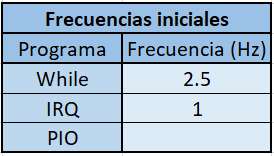

#Frecuencias maximas en las que se reconoce el titileo
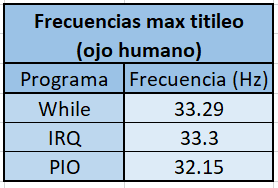

#Frecuencias maximas que permite la rasp
Aunque en teoria el valor de esta frecuencia por la maquina de estado es de 1'250.000 Hz, pudimos observar que en este caso, definiendo la variable de periodo, este valor es distinto en estos codigos, los valores obtenidos son entonces:
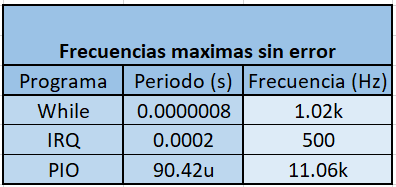

#Conclusiones:
1.Enumenre las ventajas y deventajas de cada uno de los programas.
> While:
  >>Ventajas: Es muy sencillo de utilizar. Repite una tarea hasta que verifique que el estado que esta verificando ha tenido el parametro que esta esperando para cambiar.

  >>Desventajas: Puede llegar a bloquearse, debe completar el proceso completo para validar si ocurrio algun cambio, consume CPU.

>IRQ:
>>Ventajas: Responde rapido y permite que se esten ejecutando varias tareas al tiempo ya que tiene la capacidad de interrumpir cualquier en el momento en que ocurra el factor de cambio, ahorra memoria y se ejecuta de manera inmediata, sin esperar a que termine la accion como ocurre en un buqle.

>>Desventajas: Puede ser compleja su aplicacion en terminos de priorizacion y ejecucion alterna de varias interrupciones al tiempo.

>PIO
>>Ventajas: Permite el desarrollo de tareas mas complejas sin alterar su rendimiento, realiza tareas en funcion del tiempo real.

>>Desventajas: Requiere un hadware especifico y este puede limitar algunas acciones, requiere un conocimiento mas desarrollado de programacion para implementarlo

2.Describa en que casos es convenientne cada uno de los programas.
> While: Es conveniente utilizar este bucle si se quiere realizar una accion repetitiva sin mucha intervencion del tiempo hasta que el usuario realice alguna accion.

>IRQ: Es una buena opcion cuando se quiere que alguna accion externa del usuario o del medio, interrumpa de manera inmediata el estado del programa. Es muy util en programas complejos ya que este ahorra energia antes de que se ejecute la interrupcion

>PIO: Para tareas complejas, es la opcion mas rapida y con mejor respuesta logica.

3.¿Cual es la diferencia entre time y timer?


> Time: Se usa para obtener el tiempo inmediato en el que se esta ejecutando una accion.
> Timer: Permite fijar un tiempo para que se realice o se retrase una accion determinada.

